### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
from urllib.request import urlopen
import csv

urls = {url, url2, url3, url4}

def leer_csv(url):
    datos = []
    with urlopen(url) as respuestas:
        lineas = respuestas.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

total_facturacion = 0

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    facturacion_tienda = 0


    for venta in datos_tienda:
        precio = float(venta['Precio'])
        facturacion_tienda += precio

    print(f'Facturacion tienda {i+1}: ${facturacion_tienda:.2f}')
    total_facturacion += facturacion_tienda

print(f'\nFacturacion total de todas las tiendas: ${total_facturacion:.2f}')





Facturacion tienda 1: $1098019600.00
Facturacion tienda 2: $1116343500.00
Facturacion tienda 3: $1038375700.00
Facturacion tienda 4: $1150880400.00

Facturacion total de todas las tiendas: $4403619200.00


# 2. Ventas por categoría

In [4]:
def leer_csv(url):
    datos = []
    with urlopen(url) as respuestas:
        lineas = respuestas.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

ventas_categoria = {}

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    print(f'\nVentas por categoria en tienda {i+1}:')

    categoria_tienda = {}

    for venta in datos_tienda:
        categoria = venta['Categoría del Producto']
        precio = float(venta['Precio'])
        cantidad = int(venta['Cantidad de cuotas'])
        monto_venta = precio * cantidad

        if categoria in categoria_tienda:
            categoria_tienda[categoria] += monto_venta
        else:
            categoria_tienda[categoria] = monto_venta

        if categoria in ventas_categoria:
            ventas_categoria[categoria] += monto_venta
        else:
            ventas_categoria[categoria] = monto_venta

    for categoria, monto in categoria_tienda.items():
        print(f"  {categoria}: ${monto:.2f}")

print("\nVentas por categoria (todas las tiendas):")
for categoria, monto in ventas_categoria.items():
    print(f"  {categoria}: ${monto:.2f}")

total_general = sum(ventas_categoria.values())
print(f"?nTotal general de ventas: ${total_general:.2f}")




Ventas por categoria en tienda 1:
  Electrodomésticos: $1081380800.00
  Muebles: $555092500.00
  Instrumentos musicales: $250336000.00
  Deportes y diversión: $123399200.00
  Electrónicos: $1101334500.00
  Juguetes: $61190400.00
  Artículos para el hogar: $44724600.00
  Libros: $26358900.00

Ventas por categoria en tienda 2:
  Muebles: $527332100.00
  Instrumentos musicales: $294448700.00
  Deportes y diversión: $81660600.00
  Electrónicos: $1286643600.00
  Artículos para el hogar: $42739700.00
  Juguetes: $46721200.00
  Electrodomésticos: $1026226300.00
  Libros: $31417000.00

Ventas por categoria en tienda 3:
  Electrodomésticos: $879089600.00
  Muebles: $556628000.00
  Deportes y diversión: $100062000.00
  Libros: $29543400.00
  Electrónicos: $1211446500.00
  Instrumentos musicales: $222837200.00
  Juguetes: $54641200.00
  Artículos para el hogar: $44579300.00

Ventas por categoria en tienda 4:
  Electrónicos: $1290390700.00
  Muebles: $582928200.00
  Juguetes: $49062800.00
  Elect

# 3. Calificación promedio de la tienda


In [5]:
def leer_csv(url):
    datos = []
    with urlopen(url) as respuestas:
        lineas = respuestas.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)

    suma_calificaciones = 0
    cantidad_productos = 0

    for producto in datos_tienda:
        try:

            if 'Calificación' in producto:
                calificacion = float(producto['Calificación'])
            elif 'Calificación' in producto:
                calificacion = float(producto['Calificación'])
            elif 'Calificación' in producto:
                calificacion = float(producto['Calificación'])
            elif 'Calificación' in producto:
                calificacion = float(producto['Calificación'])

            else:
                 print(f"Claves disponibles en la tienda {i+1}:", producto.keys())
                 raise KeyError("No se encontro la columna de calificacion")

            suma_calificaciones += calificacion
            cantidad_productos += 1

        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            continue
    if cantidad_productos > 0:
        calificacion_promedio = suma_calificaciones / cantidad_productos
        print(f"Calificación promedio de la tienda {i+1}: {calificacion_promedio:.2f}")
    else:
        print(f"No se pudieron procesar clasificaciones para la tienda {i+1}")






Calificación promedio de la tienda 1: 4.05
Calificación promedio de la tienda 2: 4.04
Calificación promedio de la tienda 3: 4.00
Calificación promedio de la tienda 4: 3.98


# 4. Productos más y menos vendidos

In [13]:
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

df_total['Precio']-df_total['Precio'].astype(float)
df_total['Cantidad de cuotas']-df_total['Cantidad de cuotas'].astype(int)
df_total['Ingreso'] = df_total['Precio']
ventas = df_total.groupby(['Tienda','Producto'])['Ingreso'].sum().reset_index()

def top_productos(tienda):
    data = ventas[ventas['Tienda'] == tienda]
    top_mas_vendidos = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos_vendidos = data.sort_values(by='Ingreso', ascending=True).head(3)

    print(f"\n{tienda} - TOP 3 productos que MÁS dinero generaron:")
    for _, fila in top_mas_vendidos.iterrows():
        print(f" {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

    print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
    for _, fila in top_menos_vendidos.iterrows():
        print(f" {fila['Producto']} - Ingresos: ${fila['Ingreso']:.2f}")

tienda_unicas =ventas['Tienda'].unique()

for tienda in tienda_unicas:
    top_productos(tienda)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
 Refrigerador - Ingresos: $99889700.00
 TV LED UHD 4K - Ingresos: $96669100.00
 Iphone 15 - Ingresos: $93225700.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
 Cubo mágico 8x8 - Ingresos: $640400.00
 Dinosaurio Rex - Ingresos: $795600.00
 Cuerda para saltar - Ingresos: $853800.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
 Iphone 15 - Ingresos: $113225800.00
 TV LED UHD 4K - Ingresos: $103375000.00
 Refrigerador - Ingresos: $97632500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
 Cubo mágico 8x8 - Ingresos: $643600.00
 Dinosaurio Rex - Ingresos: $770300.00
 Cuerda para saltar - Ingresos: $856900.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
 Iphone 15 - Ingresos: $96697500.00
 TV LED UHD 4K - Ingresos: $90295300.00
 Smart TV - Ingresos: $82790400.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
 Cuerda para saltar - Ingresos: $704800.00
 Cubo mágico 8x8 - Ingresos: $748400.00


In [16]:
df_total['Costo de envio'] = df_total['Costo de envío'].astype(float)
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean()

print("\nEnvío promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")



Envío promedio por tienda:
Tienda 1: $24805.68
Tienda 2: $25216.24
Tienda 3: $23459.46
Tienda 4: $26018.61


# 5. Envío promedio por tienda

In [23]:
def calcular_envio_promedio(datos_tienda, tienda_numero):
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Costo de envío'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0
    print(f"Tienda {tienda_numero} - Envío promedio: ${promedio_envio:.2f}")

for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    calcular_envio_promedio(datos_tienda, i)



Tienda 1 - Envío promedio: $24805.68
Tienda 2 - Envío promedio: $25216.24
Tienda 3 - Envío promedio: $23459.46
Tienda 4 - Envío promedio: $26018.61


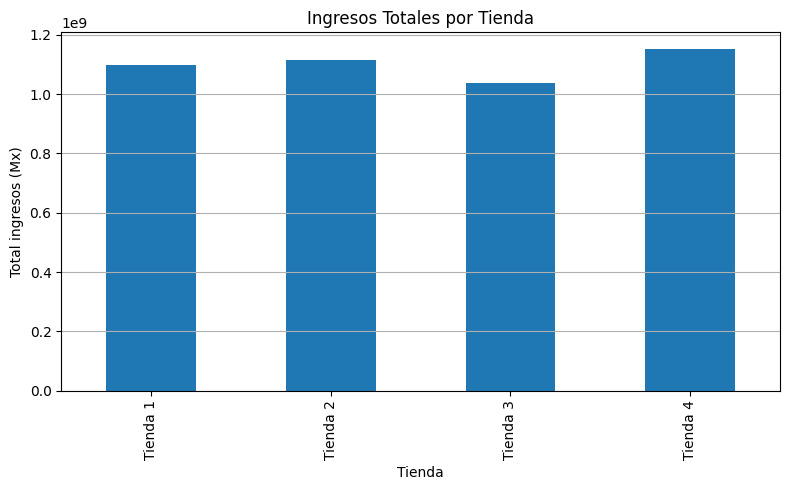

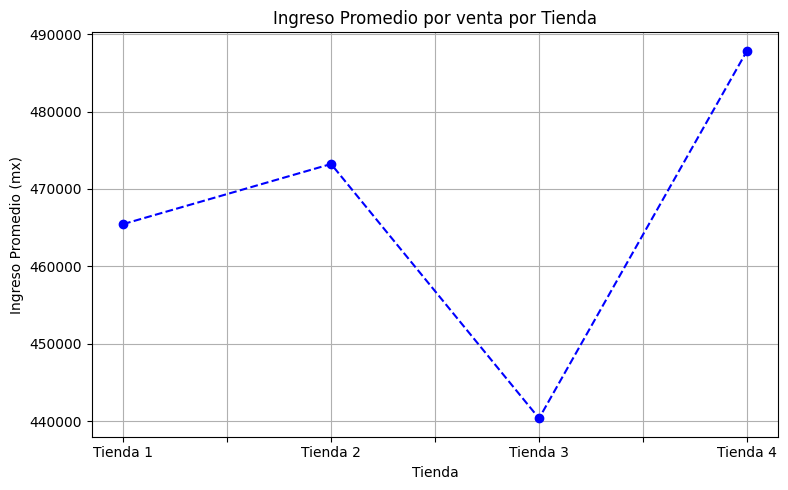

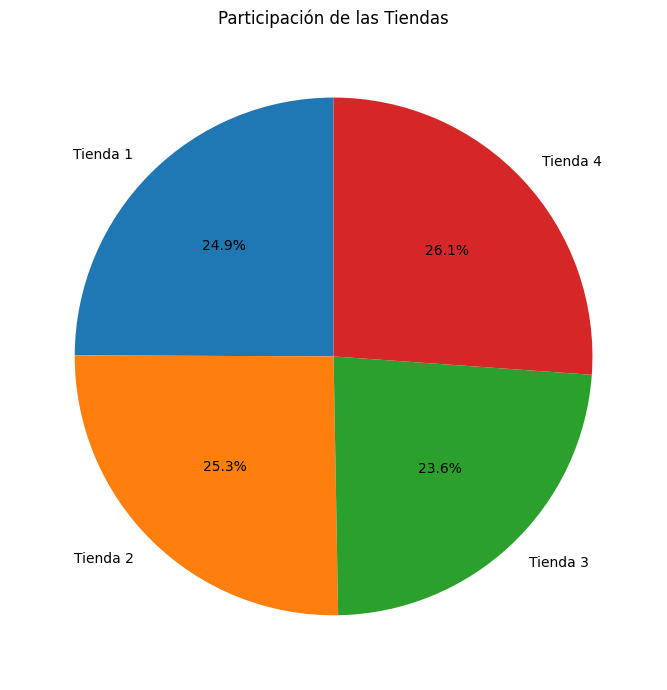

In [26]:
import matplotlib.pyplot as plt


df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Ingreso'] = df_total['Precio']

ingresos_totales = df_total.groupby('Tienda')['Ingreso'].sum()
ingreso_promedio = df_total.groupby('Tienda')['Ingreso'].mean()
distribucion_ingresos = ingresos_totales


plt.figure(figsize=(8,5))
ingresos_totales.plot(kind='bar')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total ingresos (Mx)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
ingreso_promedio.plot(kind='line', marker='o',linestyle='--',color='blue')
plt.title('Ingreso Promedio por venta por Tienda')
plt.ylabel('Ingreso Promedio (mx)')
plt.xlabel('Tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,7))
ingreso_promedio.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participación de las Tiendas')
plt.ylabel('')
plt.grid(True)
plt.tight_layout()
plt.show()


Informe de las tiendas de Alura Store.

Resumen:

El señor Juan nos pide evaluar cual de sus tiendas debe vender para poder invertirlo en un nuevo negocio.

Analisis:

Realizando el analisis la tienda número 3 tiene $1038375700.00 siendo la que menos esta facturando en terminos generales, los productos que mas se venden y que menos se venden son:
Tienda 3 - TOP 3 productos que MÁS dinero generaron:
 Iphone 15 - Ingresos: $96697500.00
 TV LED UHD 4K - Ingresos: $90295300.00
 Smart TV - Ingresos: $82790400.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
 Cuerda para saltar - Ingresos: $704800.00
 Cubo mágico 8x8 - Ingresos: $748400.00
 Dinosaurio Rex - Ingresos: $858100.00

 Aun con esto en las otras tiendas tienen un margen mayor.

 Las calificaciones promedio la tienda 3 se encuentra en penultimo lugar con una puntuacion de 4.00.

 Tiene un costo de envio $23459.46 siendo el mas bajo pero de acuerdo al margen de ganancia es la tienda que debe vender.

